<a href="https://colab.research.google.com/github/tomasramirez20/Practicadigitales-2-osciloscopio-/blob/main/Dominio_frecuencia_tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

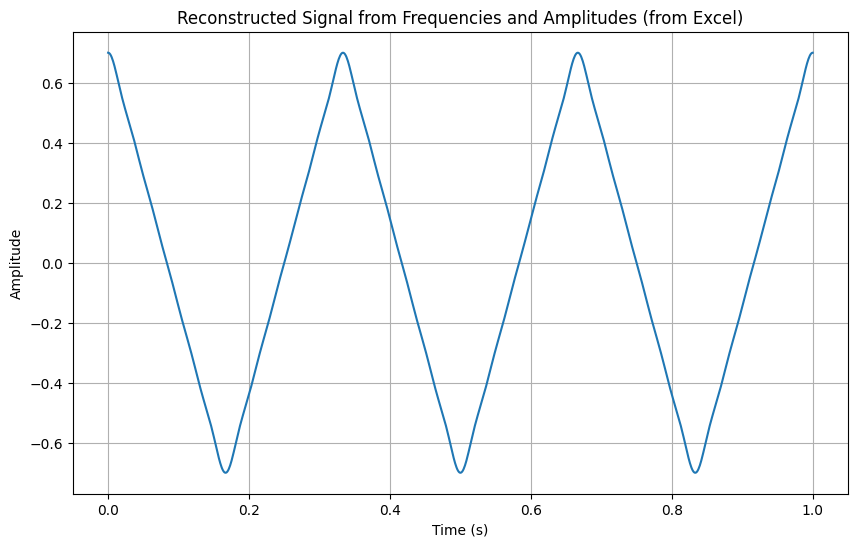

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def inverse_fourier_transform(frequencies, amplitudes_db, num_points=1000, duration=1):

    if len(frequencies) != len(amplitudes_db):
        raise ValueError("Frequencies and amplitudes lists must have the same length.")


    amplitudes_linear = 10**(np.array(amplitudes_db) / 20)


    time = np.linspace(0, duration, num_points)
    signal = np.zeros_like(time, dtype=complex)

    for freq, amp in zip(frequencies, amplitudes_linear):

        signal += amp * np.cos(2 * np.pi * freq * time)

    return time, signal.real
excel_file_path = 'FFTcopy.xlsx'

try:

    df = pd.read_excel(excel_file_path, header=None, skiprows=1)

    # Extraer datos
    if df.shape[1] >= 2:
        frequencies = df.iloc[:, 0].tolist()
        amplitudes_db = df.iloc[:, 1].tolist()

        # filtro para verificar datos
        valid_data = [(freq, amp) for freq, amp in zip(frequencies, amplitudes_db) if isinstance(freq, (int, float)) and isinstance(amp, (int, float))]
        if valid_data:
            frequencies, amplitudes_db = zip(*valid_data)
            frequencies = list(frequencies)
            amplitudes_db = list(amplitudes_db)

            # genera la señal en el tiempo
            try:
                time_signal, reconstructed_signal = inverse_fourier_transform(frequencies, amplitudes_db)

                # graficar
                plt.figure(figsize=(10, 6))
                plt.plot(time_signal, reconstructed_signal)
                plt.title('Reconstructed Signal from Frequencies and Amplitudes (from Excel)')
                plt.xlabel('Time (s)')
                plt.ylabel('Amplitude')
                plt.grid(True)
                plt.show()
            except ValueError as e:
                print(f"Error: {e}")
        else:
             print("No valid numeric frequencies or amplitudes found in the first two columns after skipping header.")
    else:
        print("Error: The Excel file must contain at least two columns for frequencies and amplitudes.")

except FileNotFoundError:
    print(f"Error: The file '{excel_file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

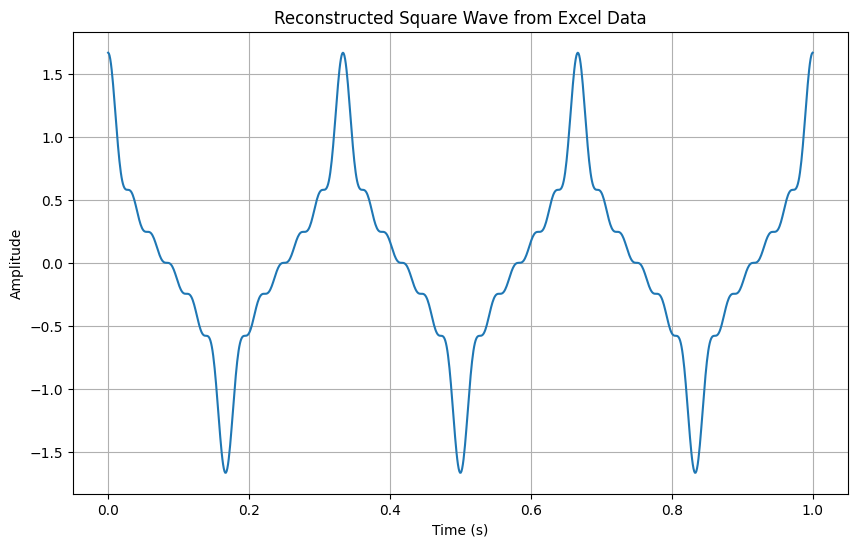

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


excel_file_path_square = 'cuadrada.xlsx'

try:
    df_square = pd.read_excel(excel_file_path_square, header=None, skiprows=1)


    if df_square.shape[1] >= 2:
        frequencies_square_excel = df_square.iloc[:, 0].tolist()
        amplitudes_db_square_excel = df_square.iloc[:, 1].tolist()


        valid_data_square = [(freq, amp) for freq, amp in zip(frequencies_square_excel, amplitudes_db_square_excel) if isinstance(freq, (int, float)) and isinstance(amp, (int, float))]
        if valid_data_square:
            frequencies_square_excel, amplitudes_db_square_excel = zip(*valid_data_square)
            frequencies_square_excel = list(frequencies_square_excel)
            amplitudes_db_square_excel = list(amplitudes_db_square_excel)


            if frequencies_square_excel and amplitudes_db_square_excel:

                try:

                    time_signal_square_excel, reconstructed_signal_square_excel = inverse_fourier_transform(
                        frequencies_square_excel,
                        amplitudes_db_square_excel,
                        duration=1,
                        num_points=1000
                    )


                    plt.figure(figsize=(10, 6))
                    plt.plot(time_signal_square_excel, reconstructed_signal_square_excel)
                    plt.title('Reconstructed Square Wave from Excel Data')
                    plt.xlabel('Time (s)')
                    plt.ylabel('Amplitude')
                    plt.grid(True)
                    plt.show()
                except ValueError as e:
                    print(f"Error: {e}")
            else:
                print("No valid frequencies or amplitudes found in the first two columns of the Excel file.")
        else:
            print("No valid numeric frequencies or amplitudes found in the first two columns after skipping header.")
    else:
        print("Error: The Excel file must contain at least two columns for frequencies and amplitudes.")

except FileNotFoundError:
    print(f"Error: The file '{excel_file_path_square}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

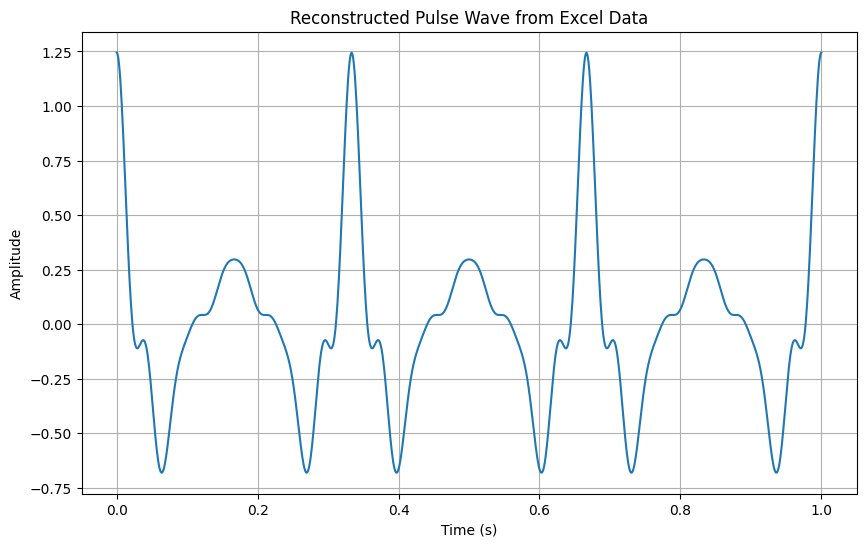

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


excel_file_path_pulse = 'pulsoo.xlsx'

try:

    df_pulse = pd.read_excel(excel_file_path_pulse, header=None, skiprows=1)


    if df_pulse.shape[1] >= 2:
        frequencies_pulse_excel = df_pulse.iloc[:, 0].tolist()
        amplitudes_db_pulse_excel = df_pulse.iloc[:, 1].tolist()


        valid_data_pulse = [(freq, amp) for freq, amp in zip(frequencies_pulse_excel, amplitudes_db_pulse_excel) if isinstance(freq, (int, float)) and isinstance(amp, (int, float))]
        if valid_data_pulse:
            frequencies_pulse_excel, amplitudes_db_pulse_excel = zip(*valid_data_pulse)
            frequencies_pulse_excel = list(frequencies_pulse_excel)
            amplitudes_db_pulse_excel = list(amplitudes_db_pulse_excel)

            if frequencies_pulse_excel and amplitudes_db_pulse_excel:

                try:

                    time_signal_pulse_excel, reconstructed_signal_pulse_excel = inverse_fourier_transform(
                        frequencies_pulse_excel,
                        amplitudes_db_pulse_excel,
                        duration=1, # Example duration, adjust as needed
                        num_points=1000
                    )

                    # Plot the results
                    plt.figure(figsize=(10, 6))
                    plt.plot(time_signal_pulse_excel, reconstructed_signal_pulse_excel)
                    plt.title('Reconstructed Pulse Wave from Excel Data')
                    plt.xlabel('Time (s)')
                    plt.ylabel('Amplitude')
                    plt.grid(True)
                    plt.show()
                except ValueError as e:
                    print(f"Error: {e}")
            else:
                print("No valid frequencies or amplitudes found in the first two columns of the Excel file.")
        else:
             print("No valid numeric frequencies or amplitudes found in the first two columns after skipping header.")
    else:
        print("Error: The Excel file must contain at least two columns for frequencies and amplitudes.")

except FileNotFoundError:
    print(f"Error: The file '{excel_file_path_pulse}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")